In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
import xgboost
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

# Loading the Data

In [2]:
train = fetch_20newsgroups(subset='train', shuffle=True)
test = fetch_20newsgroups(subset='test', shuffle=True)

In [3]:
print('These are the categories:\n') 
train.target_names

These are the categories:



['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# ML Algorithms

We're going to use different algorithms and assess their performance towards the problem at hand 🤚 

By building a pipeline, this will do several tasks for us by writing just a simple line of code.

- Vectorizing -> Tokenize our text words and count them.
- TF-IDF -> Compute term frequencies and then reduce the weight of common words that appear everywhere (like definite and undefinite articles, prepositions, etc.).
- Load an instance of the corresponding algorithm

## Naive Bayes

In [4]:
NB_clf = Pipeline([('vector', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', MultinomialNB())])

In [5]:
NB_clf = NB_clf.fit(train.data, train.target)

We're going to predict categories of texts in our test data by using the model we have just trained before.

In [6]:
predictions = NB_clf.predict(test.data)
print('We\'ve got', float('{:.2f}'.format(np.mean(predictions == test.target))), 'accuracy')

We've got 0.77 accuracy


In [7]:
print(classification_report(test.target, predictions, target_names = test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
                 sci.med       0.92      0.74      0.82       396
         

In [8]:
cm = confusion_matrix(test.target, predictions)
print(cm)

[[166   0   0   1   0   1   0   0   1   1   1   3   0   6   3 123   4   8
    0   1]
 [  1 252  15  12   9  18   1   2   1   5   2  41   4   0   6  15   4   1
    0   0]
 [  0  14 258  45   3   9   0   2   1   3   2  25   1   0   6  23   2   0
    0   0]
 [  0   5  11 305  17   1   3   6   1   0   2  19  13   0   5   3   1   0
    0   0]
 [  0   3   8  23 298   0   3   8   1   3   1  16   8   0   2   8   3   0
    0   0]
 [  1  21  17  13   2 298   1   0   1   1   0  23   0   1   4  10   2   0
    0   0]
 [  0   1   3  31  12   1 271  19   4   4   6   5  12   6   3   9   3   0
    0   0]
 [  0   1   0   3   0   0   4 364   3   2   2   4   1   1   3   3   4   0
    1   0]
 [  0   0   0   1   0   0   2  10 371   0   0   4   0   0   0   8   2   0
    0   0]
 [  0   0   0   0   1   0   0   4   0 357  22   0   0   0   2   9   1   1
    0   0]
 [  0   0   0   0   0   0   0   1   0   4 387   1   0   0   1   5   0   0
    0   0]
 [  0   2   1   0   0   1   1   3   0   0   0 383   1   0   0   3

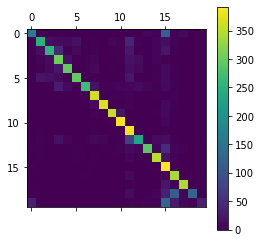

In [9]:
plt.matshow(cm)
plt.colorbar()

## Support Vector Machines 

In [10]:
SVC_clf = Pipeline([('vector', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SVC())])

In [11]:
SVC_clf = SVC_clf.fit(train.data, train.target)

In [12]:
predictions = SVC_clf.predict(test.data)
print('We\'ve got', float('{:.2f}'.format(np.mean(predictions == test.target))), 'accuracy')

We've got 0.82 accuracy


In [13]:
print(classification_report(test.target, predictions, target_names = test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.71      0.76       319
           comp.graphics       0.62      0.82      0.71       389
 comp.os.ms-windows.misc       0.80      0.70      0.75       394
comp.sys.ibm.pc.hardware       0.73      0.78      0.76       392
   comp.sys.mac.hardware       0.82      0.83      0.82       385
          comp.windows.x       0.83      0.73      0.77       395
            misc.forsale       0.73      0.91      0.81       390
               rec.autos       0.90      0.87      0.89       396
         rec.motorcycles       0.96      0.93      0.95       398
      rec.sport.baseball       0.88      0.91      0.90       397
        rec.sport.hockey       0.97      0.91      0.94       399
               sci.crypt       0.96      0.85      0.90       396
         sci.electronics       0.65      0.85      0.74       393
                 sci.med       0.88      0.78      0.82       396
         

In [14]:
cm = confusion_matrix(test.target, predictions)
print(cm)

[[226   6   0   0   2   1   2   0   1   3   0   1   4   8   3  34   1   2
    3  22]
 [  1 320   8   8   7  15   4   1   0   2   0   3  14   1   1   2   0   0
    2   0]
 [  0  28 277  39   9  12   2   2   1   3   0   2   6   2   2   3   0   0
    5   1]
 [  0  15  15 307  15   3  15   2   0   0   0   0  19   0   0   0   1   0
    0   0]
 [  0   5   4  19 318   2  13   0   0   5   0   0  18   0   0   0   0   0
    1   0]
 [  0  51  36   6   4 288   4   0   0   0   0   0   2   2   2   0   0   0
    0   0]
 [  0   5   1  11   3   0 353   4   1   2   1   0   8   1   0   0   0   0
    0   0]
 [  0   5   0   5   1   2  15 346   3   0   0   0  13   1   1   0   2   0
    2   0]
 [  0   2   0   0   0   0   7  11 371   1   0   0   4   2   0   0   0   0
    0   0]
 [  0   2   0   0   2   1  10   1   1 361  12   0   3   0   0   2   0   0
    1   1]
 [  0   2   0   1   4   3   6   0   0  11 365   0   3   0   0   1   0   0
    3   0]
 [  1   9   1   1   4   4   9   1   1   3   0 337  13   0   1   0

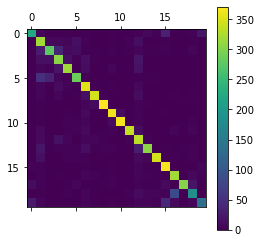

In [15]:
plt.matshow(cm)
plt.colorbar()

## XGBoost

In [16]:
XGB_clf = Pipeline([('vector', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', xgboost.XGBClassifier())])

In [17]:
XGB_clf = XGB_clf.fit(train.data, train.target)

In [18]:
predictions = XGB_clf.predict(test.data)
print('We\'ve got', float('{:.2f}'.format(np.mean(predictions == test.target))), 'accuracy')

We've got 0.75 accuracy


In [19]:
print(classification_report(test.target, predictions, target_names = test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.75      0.66      0.70       319
           comp.graphics       0.62      0.69      0.65       389
 comp.os.ms-windows.misc       0.69      0.70      0.70       394
comp.sys.ibm.pc.hardware       0.59      0.67      0.63       392
   comp.sys.mac.hardware       0.69      0.78      0.74       385
          comp.windows.x       0.79      0.64      0.70       395
            misc.forsale       0.85      0.85      0.85       390
               rec.autos       0.79      0.79      0.79       396
         rec.motorcycles       0.88      0.85      0.86       398
      rec.sport.baseball       0.81      0.84      0.83       397
        rec.sport.hockey       0.91      0.86      0.89       399
               sci.crypt       0.90      0.82      0.86       396
         sci.electronics       0.52      0.61      0.56       393
                 sci.med       0.77      0.76      0.76       396
         

In [20]:
cm = confusion_matrix(test.target, predictions)
print(cm)

[[209   2   0   1   7   1   1   1   1   1   3   2   5   8   6  19   4   4
    3  41]
 [  1 268  12  25  18  23   4   1   4   4   1   1  13   4   3   3   1   1
    1   1]
 [  1  20 277  42  17  10   1   0   3   4   0   2   7   2   2   0   2   1
    3   0]
 [  1  14  30 264  20   8   9   4   0   0   1   3  34   2   0   0   1   0
    0   1]
 [  1   6   4  32 301   3   7   1   0   3   0   1  18   3   1   2   0   0
    2   0]
 [  0  47  56   5  10 252   1   3   1   0   0   1  10   0   3   0   2   1
    3   0]
 [  0   3   2  14  10   1 333   3   4   2   0   1  10   4   2   1   0   0
    0   0]
 [  0   4   0   3   2   0   6 314  14   2   0   0  32   3   1   2  11   0
    2   0]
 [  1   2   0   3   3   2   5  18 338   3   1   1   4   8   2   2   4   0
    1   0]
 [  1   5   0   6   2   3   2   7   3 334  17   0   4   5   3   0   0   0
    2   3]
 [  0   1   0   1   5   1   5   0   0  31 343   0   3   1   2   1   3   0
    2   0]
 [  0   4   2   6   4   2   2   2   4   5   0 326  15   3   3   0

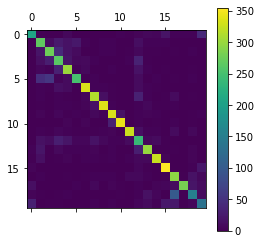

In [21]:
plt.matshow(cm)
plt.colorbar()

## Optimizing our models

We've obtained good results with the previous algorithms but this can be improved! Let's tune some hyperparameters to see the results.

In [22]:
params_to_test = {
    "Naive Bayes": {
        "model": NB_clf,
        "param": {"clf__alpha": (0.01, 0.001)}  
    },
    "Support Vector Machines": {
        "model": SVC_clf,
        "param": {"clf__C": (0.1, 1, 10)}
    }
}

In [23]:
NB_clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vector', 'tfidf', 'clf', 'vector__analyzer', 'vector__binary', 'vector__decode_error', 'vector__dtype', 'vector__encoding', 'vector__input', 'vector__lowercase', 'vector__max_df', 'vector__max_features', 'vector__min_df', 'vector__ngram_range', 'vector__preprocessor', 'vector__stop_words', 'vector__strip_accents', 'vector__token_pattern', 'vector__tokenizer', 'vector__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__alpha', 'clf__class_prior', 'clf__fit_prior'])

In [24]:
SVC_clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vector', 'tfidf', 'clf', 'vector__analyzer', 'vector__binary', 'vector__decode_error', 'vector__dtype', 'vector__encoding', 'vector__input', 'vector__lowercase', 'vector__max_df', 'vector__max_features', 'vector__min_df', 'vector__ngram_range', 'vector__preprocessor', 'vector__stop_words', 'vector__strip_accents', 'vector__token_pattern', 'vector__tokenizer', 'vector__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__C', 'clf__break_ties', 'clf__cache_size', 'clf__class_weight', 'clf__coef0', 'clf__decision_function_shape', 'clf__degree', 'clf__gamma', 'clf__kernel', 'clf__max_iter', 'clf__probability', 'clf__random_state', 'clf__shrinking', 'clf__tol', 'clf__verbose'])

In [25]:
scores = []

for key, value in tqdm(params_to_test.items()):
    gs_clf = GridSearchCV(value["model"], value["param"], scoring='accuracy', n_jobs=-1, cv=3)
    gs_clf.fit(train.data, train.target)
    scores.append({
        'Algorithm': key,
        'Best score': gs_clf.best_score_,
        'Best params': gs_clf.best_params_
    })

scores_df = pd.DataFrame(scores, columns=['Algorithm', 'Best score', 'Best params'])
scores_df

100%|██████████| 2/2 [07:45<00:00, 232.72s/it]


,Algorithm,Best score,Best params
0,Naive Bayes,0.904543,{'clf__alpha': 0.01}
1,Support Vector Machines,0.894379,{'clf__C': 10}


The trade-off here seems to be on the side of the Naive Bayes algorithm tuning the parameter alpha to 0.01. It's fast and accuracy is high too.

In [28]:
best_NB_clf = Pipeline([('vector', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', MultinomialNB(alpha=0.01))])

In [31]:
best_NB_clf = best_NB_clf.fit(train.data, train.target)

In [32]:
predictions = best_NB_clf.predict(test.data)

In [33]:
print(classification_report(test.target, predictions, target_names = test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.78      0.80       319
           comp.graphics       0.69      0.75      0.72       389
 comp.os.ms-windows.misc       0.74      0.63      0.68       394
comp.sys.ibm.pc.hardware       0.65      0.75      0.69       392
   comp.sys.mac.hardware       0.83      0.84      0.83       385
          comp.windows.x       0.84      0.78      0.81       395
            misc.forsale       0.82      0.78      0.80       390
               rec.autos       0.89      0.90      0.90       396
         rec.motorcycles       0.93      0.96      0.95       398
      rec.sport.baseball       0.95      0.94      0.95       397
        rec.sport.hockey       0.95      0.97      0.96       399
               sci.crypt       0.89      0.93      0.91       396
         sci.electronics       0.79      0.77      0.78       393
                 sci.med       0.89      0.84      0.86       396
         

In [34]:
cm = confusion_matrix(test.target, predictions)
print(cm)

[[249   0   0   4   0   1   0   0   1   1   0   1   0   5   5  28   3   3
    1  17]
 [  0 290  15  14  10  23   6   0   0   3   0   4  12   0   7   2   0   2
    0   1]
 [  1  32 248  52   4  20   5   0   2   1   1   6   3   3   5   4   0   0
    4   3]
 [  0  11  26 293  22   1  11   1   0   1   0   1  21   0   4   0   0   0
    0   0]
 [  0   7  10  14 322   1   8   4   1   2   1   2   9   2   1   0   1   0
    0   0]
 [  0  40  14  11   6 307   3   1   2   0   0   3   2   1   4   0   1   0
    0   0]
 [  0   4   6  26   8   0 306  11   9   1   5   0   9   4   1   0   0   0
    0   0]
 [  0   1   1   5   1   0  10 358   6   1   0   0   6   3   1   0   2   0
    1   0]
 [  0   1   0   1   1   0   2   7 383   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   3   4   0 373  11   1   0   0   2   0   0   2
    0   0]
 [  0   0   0   0   0   1   1   0   0   4 387   2   0   1   0   2   1   0
    0   0]
 [  1   3   1   2   2   1   3   3   0   0   0 370   1   3   2   0

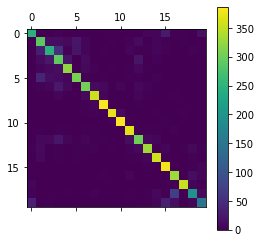

In [35]:
plt.matshow(cm)
plt.colorbar()